### 載入整理資料

In [1]:
from keras.datasets import imdb  #從 keras.datasets 套件中匯入 imdb 資料

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(
    num_words=10000)  #從 imdb 中讀取, 只有在訓練集當中最常用的前 10,000 個單字才會被載入, 分別存入 (訓練資料, 訓練標籤) 和 (測試資料, 測試標籤)

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤

Using TensorFlow backend.


### 顯示結果函式

In [2]:
def show_result(history, model):
    history_dict = history.history
    
    loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
    val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數
    
    epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間
    
    plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
    plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
    plt.legend()  #可以追加每個輸出圖表的圖像名稱
    plt.show()  #顯示圖表

    plt.clf()  #清除圖表
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估
    print(results)

### 一個隱藏層

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.5011 - acc: 0.7982 - val_loss: 0.3909 - val_acc: 0.8751
Epoch 2/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.3172 - acc: 0.9023 - val_loss: 0.3210 - val_acc: 0.8843
Epoch 3/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.2444 - acc: 0.9257 - val_loss: 0.2889 - val_acc: 0.8911
Epoch 4/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.2029 - acc: 0.9383 - val_loss: 0.2793 - val_acc: 0.8906
Epoch 5/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1726 - acc: 0.9466 - val_loss: 0.2896 - val_acc: 0.8828
Epoch 6/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1490 - acc: 0.9565 - val_loss: 0.2748 - val_acc: 0.8890
Epoch 7/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.1291 - acc: 0.9637 - val_loss: 0.2813 - val_acc

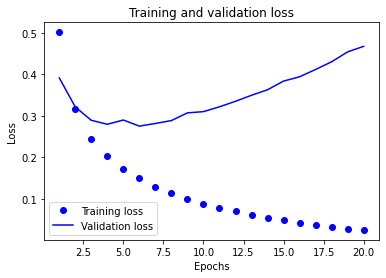

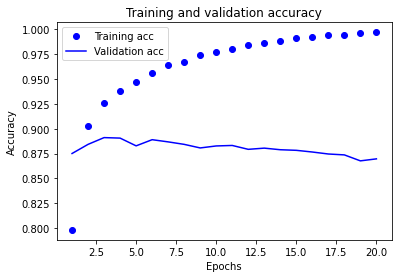

25000/25000 [==============================] - 3s 106us/step
[0.5090877551698685, 0.8570399880409241]


array([[0.0556086 ],
       [0.99999857],
       [0.9761898 ],
       ...,
       [0.01402939],
       [0.0386802 ],
       [0.7610543 ]], dtype=float32)

In [4]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  #調整優化器
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=[metrics.binary_accuracy])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)

### 三個隱藏層

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.5445 - acc: 0.7779 - val_loss: 0.4138 - val_acc: 0.8602
Epoch 2/20
15000/15000 [==============================] - 1s 41us/step - loss: 0.3206 - acc: 0.8989 - val_loss: 0.3057 - val_acc: 0.8876
Epoch 3/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.2208 - acc: 0.9283 - val_loss: 0.2798 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.1703 - acc: 0.9435 - val_loss: 0.2763 - val_acc: 0.8872
Epoch 5/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1345 - acc: 0.9563 - val_loss: 0.2976 - val_acc: 0.8822
Epoch 6/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.1067 - acc: 0.9657 - val_loss: 0.3207 - val_acc: 0.8796
Epoch 7/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.0864 - acc: 0.9742 - val_loss: 0.3430 - val_acc

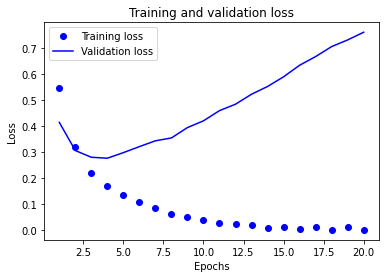

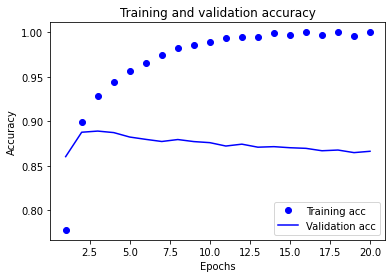

25000/25000 [==============================] - 2s 90us/step
[0.8333920603632927, 0.851639986038208]


array([[0.00611882],
       [0.9999999 ],
       [0.994207  ],
       ...,
       [0.00100104],
       [0.04027338],
       [0.65036154]], dtype=float32)

In [5]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  #調整優化器
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=[metrics.binary_accuracy])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)